In [ ]:
from random import Random
from math import sqrt, ceil
from matplotlib.pyplot import figure

In [ ]:
SEED = 5
random_gen = Random(x = SEED)

def generate_points(N = 1000):
    lst_x, lst_y = [], []
    for _ in range(N):
        lst_x.append(random_gen.uniform(a = 0, b = 1))
    for _ in range(N):
        lst_y.append(random_gen.uniform(a = 0, b = 1))
    return lst_x, lst_y

In [ ]:
def calc_grad(x_p, y_p, batch_x, batch_y):        # calc grads & losses for "batches" in SGD
    sum_x , sum_y = 0., 0.

    for x_i, y_i in zip(batch_x, batch_y):
        inv_sqrt = ((x_i - x_p) ** 2 + (y_i  - y_p) ** 2) ** (-0.5)
        sum_x += inv_sqrt * (x_i - x_p)
        sum_y += inv_sqrt * (y_i - y_p)

    return -sum_x / len(batch_x), -sum_y / len(batch_x)

In [ ]:
def loss(x_p, y_p, batch_x, batch_y):
    return (1 / len(batch_x)) * sum( [sqrt( (x_i - x_p)**2 + (y_i - y_p)**2)
                                      for x_i, y_i in zip(batch_x, batch_y)])

In [ ]:
data_x, data_y = generate_points()

In [ ]:
sampler = Random(x = SEED)

# Choosing an initial estimate that is closer to the original/true number results in a better prediction
x_p_gd, y_p_gd = 0.3, 0.3
x_p_sgd, y_p_sgd = 0.3, 0.3
losses_sqd, losses_gd = [], []


EPOCHS = 100      # Number of times to visit the WHOLE dataset
BATCH_SZ = 4      # In SGD, Number of points contributing to the gradient estimates in one update
NUM_BATCHES = ceil(len(data_x) / BATCH_SZ)                     # len(data_x) // BATCH_SZ       # (// => Floor Division)
DELTA = 1e-2

indices = [i for i in range(len(data_x))]

for _ in range(EPOCHS):
    sampler.shuffle(indices)    # Shuffle the indices of the data's list (every time it will be shuffled in the same order because we seeded the random generator)
    # SGD, Gradient is estimated using batches of our data points
    for batch_ind in range(NUM_BATCHES):
        batch_indices = indices[batch_ind * BATCH_SZ: batch_ind * BATCH_SZ + BATCH_SZ]
        batch_x = [data_x[i] for i in batch_indices]
        batch_y = [data_y[i] for i in batch_indices]
        grad_x_sgd, grad_y_sgd = calc_grad(x_p_sgd, y_p_sgd, batch_x, batch_y)
        x_p_sgd -= DELTA * grad_x_sgd
        y_p_sgd -= DELTA * grad_y_sgd
        losses_sqd.append(loss(x_p_sgd, y_p_sgd, data_x, data_y))

    # GD, Gradient is estimated using all of our data points
    grad_x_gd, grad_y_gd = calc_grad(x_p_gd, y_p_gd, data_x, data_y)
    x_p_gd -= DELTA * grad_x_gd
    y_p_gd -= DELTA * grad_y_gd
    losses_gd.append(loss(x_p_gd, y_p_gd, data_x, data_y))


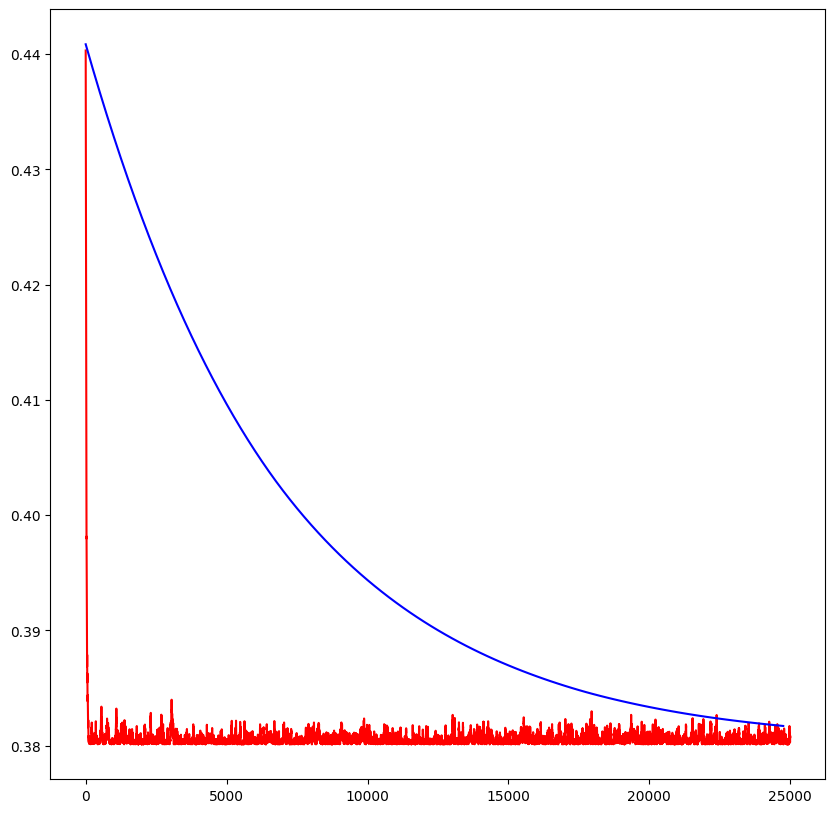

In [ ]:
fig = figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(losses_sqd, "r")
ax.plot([i*NUM_BATCHES for i in range(len(losses_gd))], losses_gd,  "b")
#ax.set_xlim(24000, 25000)
#ax.set_xlim(0, 100)
#ax.set_ylim(0.38, 0.39)

## A Noisy Estimator Of The Gradient From SGD

0.2094563824951179 0.9019666798266611
0.31245036934290693 0.7905378024073634
0.6031099974076544 0.9121284113604893


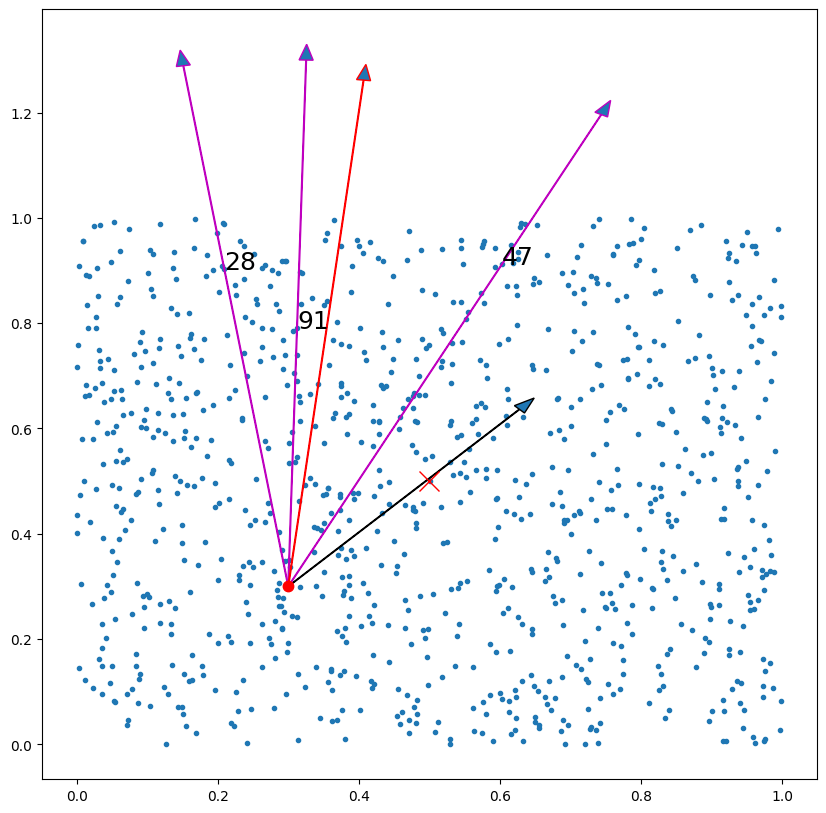

In [ ]:
fig = figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1)

# Plot Data_x & Data_y
ax.scatter(x=data_x, y=data_y, marker=".")

# Plot our Initial Guess
x_p, y_p = 0.3, 0.3
ax.plot(x_p, y_p, "r.", markersize=15)
# Plot Our True solution
ax.plot(0.5, 0.5, "rx", markersize=15)

# Plotting The Direction Opposite to that of The Gradient
grad_x, grad_y = calc_grad(x_p, y_p, data_x, data_y)
ax.arrow(x_p, y_p, -grad_x, -grad_y, head_width=0.02)

# Plotting For each point in the batch
batch_indices = [28, 91, 47]    # Random indices (batch_size of 3)
for i in batch_indices:
    ax.text(data_x[i], data_y[i], str(i), fontsize=18)
    # Calculate The Gradient For each one of them (index)
    grad_x_pnt, grad_y_pnt = calc_grad(x_p, y_p, [data_x[i]], [data_y[i]])
    ax.arrow(x_p, y_p, -grad_x_pnt, -grad_y_pnt, head_width=0.02, edgecolor='m')
    print(data_x[i], data_y[i])

# Plotting For a batch_size of 3 (Gradient Contributed By The Batch)
grad_x_pnt, grad_y_pnt = calc_grad(x_p, y_p, [data_x[i] for i in batch_indices], [data_y[i] for i in batch_indices])
ax.arrow(x_p, y_p, -grad_x_pnt, -grad_y_pnt, head_width=0.02, edgecolor='r')